# AirBnB Listings Analysis

### Objective 1: Data Prep & QA

 * Read AirBnB listings data (use low_memory=False and encoding="ISO-8859-1" in read_csv)
 * Cast any date columns as a datetime format
 * Filter the data down to rows where the city is Paris
 * QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets\Airbnb_Data\Listings.csv", low_memory=False, encoding="ISO-8859-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [4]:
df["host_since"] = pd.to_datetime(df["host_since"])

In [5]:
paris_df = (
    df
    .query("city =='Paris'")
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
)

In [6]:
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [7]:
paris_df.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [8]:
paris_df = paris_df.dropna()

In [9]:
paris_df.isnull().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [10]:
paris_df.describe()

,accommodates,price
count,64657.000000,64657.000000
mean,3.037877,113.104614
std,1.588382,214.479626
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [11]:
paris_df.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [12]:
paris_df.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [13]:
paris_df.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

# Objective 2: Prepare for Visualization

- Create a table named `paris_listings_neighbourhood` that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high).
- Create a table named `paris_listings_accomodations`, filter down to the most expensive neighborhood, group by the `accommodations` column, and add the mean price for each value of `accommodates` (sorted low to high)
- Create a table called `paris_listings_over_time` grouped by the `host_since` year, and calculate the average price and count of rows representing the number of new hosts

In [14]:
paris_listings_neighbourhood = (paris_df
            .groupby('neighbourhood')
            .agg({"price": "mean"})
            .sort_values("price")
           )

paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.911561
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.222069
Reuilly,89.058402
Popincourt,90.518955
Gobelins,98.110184
Observatoire,101.873591
Batignolles-Monceau,102.615616
Enclos-St-Laurent,102.988752


In [15]:
paris_exp_nbd = (paris_df
                 .groupby('neighbourhood')['price']
                 .mean().idxmax()
                )

print(paris_exp_nbd)

Elysee


In [16]:
paris_listings_accommodations = (paris_df
            .query("neighbourhood == 'Elysee'")
            .groupby("accommodates")
            .agg({"price": "mean"})
            .sort_values("price")
           )
paris_listings_accommodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [17]:
paris_listings_accommodations.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [18]:
paris_listings_over_time = (paris_df
                            .set_index("host_since")
                            .resample("Y")
                            .agg({"neighbourhood" : "count" , "price" : "mean"})

)
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# Objective 3: Visualize the Data

- Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed
- Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed
- Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed
- Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?
- BONUS: Create a dual axis line chart to show both new hosts and average price over time


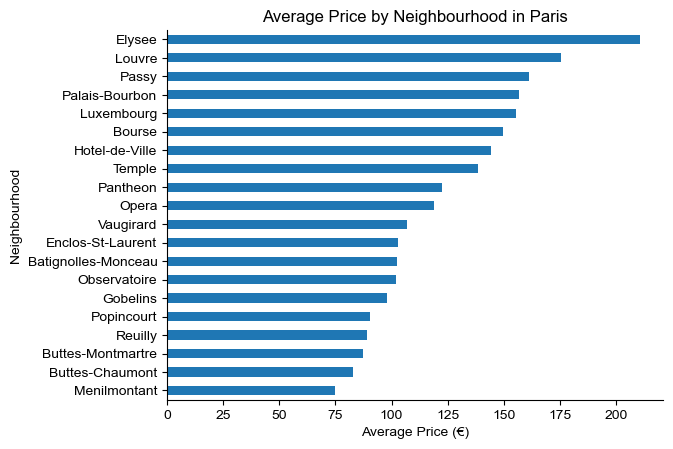

In [19]:
paris_listings_neighbourhood.plot.barh()

sns.set(style="white")
plt.title('Average Price by Neighbourhood in Paris')
plt.xlabel('Average Price (€)')
plt.ylabel('Neighbourhood')
plt.legend().remove()
plt.grid(False)

sns.despine()

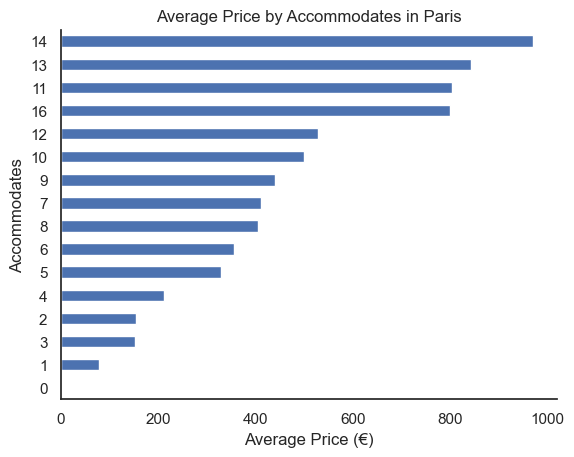

In [20]:
paris_listings_accommodations.plot.barh()

sns.set(style="white")
plt.title('Average Price by Accommodates in Paris')
plt.xlabel('Average Price (€)')
plt.ylabel('Accommodates')
plt.legend().remove()
plt.grid(False)

sns.despine()

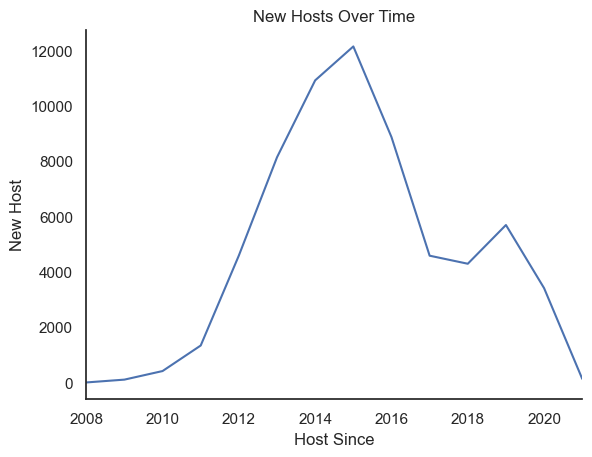

In [21]:
paris_listings_over_time["neighbourhood"].plot.line()

sns.set(style="white")
plt.title('New Hosts Over Time')
plt.xlabel("Host Since")
plt.ylabel("New Host")
plt.legend().remove()
plt.grid(False)

sns.despine()

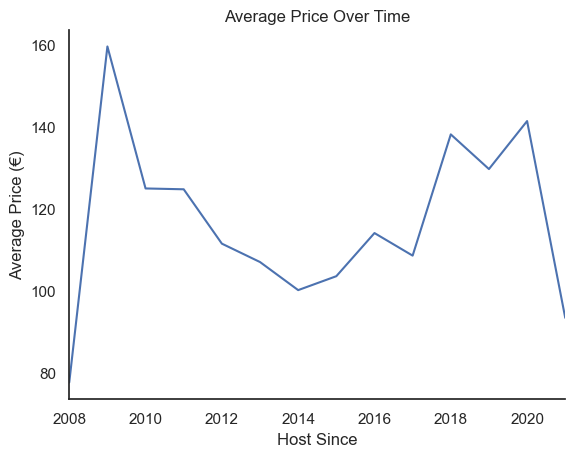

In [22]:
paris_listings_over_time["price"].plot.line()

sns.set(style="white")
plt.title('Average Price Over Time')
plt.xlabel("Host Since")
plt.ylabel("Average Price (€)")
plt.legend().remove()
plt.grid(False)

sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Few host, high price')

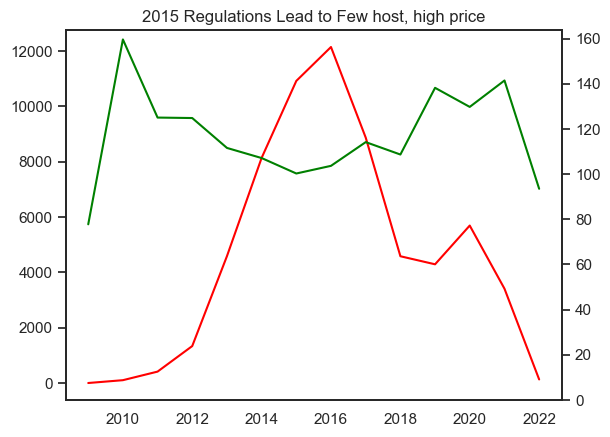

In [23]:
fig, ax = plt.subplots()

ax.plot(paris_listings_over_time.index,
       paris_listings_over_time["neighbourhood"],
       label = "New Hosts",
       c = "red"
       
)

ax2 = ax.twinx()
ax2.plot(
        paris_listings_over_time.index,
        paris_listings_over_time["price"],
        label = "Average Price",
        c = "green"
)
         
ax2.set_ylim(0)        
ax2.set_label("Average Price")
ax.set_title("2015 Regulations Lead to Few host, high price")